# Linear regression - การวิเคราะห์การถดถอย

![alt text](https://nosimpler.me/wp-content/uploads/2016/11/lr-formula-300x225.png)


## 5 steps to linear regression

In [ ]:
import numpy as np

# create dataset and label
x = np.array([2, 3, 5, 7, 9]).reshape((-1, 1))
y = np.array([4, 5, 7, 10, 15])

print('training set', x, sep='\n')
print('label', y, sep='\n')

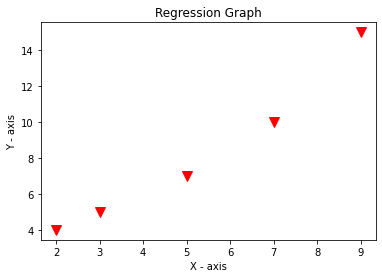

In [ ]:
# regression graph
import matplotlib.pyplot as plt
import math

plt.plot(x,y,'v',color='red', markersize='10')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.title('Regression Graph')
plt.show()

### Step 1: calculate x^2 and xy

In [ ]:
# step 1: For each (x,y) point calculate x^2 and xy
x2 = np.power(x, 2)
xy = x * y.reshape((-1,1))
#xy = np.multiply(x,y.reshape((-1,1)))

print('x2', x2, sep='\n')
print('xy', xy, sep='\n')

x2
[[ 4]
 [ 9]
 [25]
 [49]
 [81]]
xy
[[  8]
 [ 15]
 [ 35]
 [ 70]
 [135]]


### Step 2: sum all x, y, x^2, xy

In [ ]:
# step 2: sum all x, y, x^2, xy
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x2)
sum_x_2 = np.power(sum_x, 2)
sum_xy = np.sum(xy)
N = np.count_nonzero(x)

print('sum_x ', sum_x)
print('sum_y ', sum_y)
print('sum_x2 ', sum_x2)
print('sum_x_2 ', sum_x_2)
print('sum_xy ', sum_xy)
print('N ', N)

sum_x  26
sum_y  41
sum_x2  168
sum_x_2  676
sum_xy  263
N  5


### Step 3: calculate slope - b

In [ ]:
# step 3: calculate slope - b
b = ((N * sum_xy) - (sum_x * sum_y)) / ((N * sum_x2) - sum_x_2)
print('slope (b): ', b)

slope (b):  1.5182926829268293


### Step 4: calculate intercept - a

In [ ]:
# step 4: calculate intercept - a
a = (sum_y - (b * sum_x)) / N
print('intercept (a): ', a)

intercept (a):  0.30487804878048763


### Step 5: assemble the equation of a line: y = bx + a

In [ ]:
# step 5: assemble the equation of a line: y = bx + a

# new data
new_data = np.copy(x)
y_pred = (b * new_data) + a 
print('Prediction value ', y_pred, sep='\n')

Prediction value 
[[ 3.34146341]
 [ 4.8597561 ]
 [ 7.89634146]
 [10.93292683]
 [13.9695122 ]]


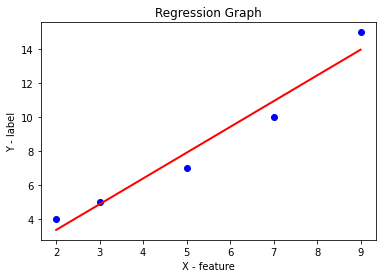

In [ ]:
# regression graph
import matplotlib.pyplot as plt
import math

plt.plot(x,y,'o',color='blue')
plt.plot(x, y_pred, color='red', linewidth=2)
plt.xlabel('X - feature')
plt.ylabel('Y - label')
plt.title('Regression Graph')
plt.show()

In [ ]:
new_data = np.array([8])
y_pred_new = (b * new_data) + a
print('Prediction value', y_pred_new, sep='\n')

Prediction value
[12.45121951]


## Create linear regression class and function

### Methods
* **fit** - Fit linear model
* **predict** - Predict using the linear model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class lr():
  """
  Linear regression using least squares method
  """

  def fit(self, x, y):
    """
    Fit model

    Parameters
    ----------
    X : array_like, shape (n_samples, n_features)
        Training data
    y : array_like, shape (n_samples, )
        Target value

    Return
    ----------
    self : returns an instance of self
    """

    x2 = np.power(x, 2)
    xy = x * y.reshape((-1,1))
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum(x2)
    sum_x_2 = np.power(sum_x, 2)
    sum_xy = np.sum(xy)
    self.n_samples = np.count_nonzero(x)

    self.slope_ = ((self.n_samples * sum_xy) - (sum_x * sum_y)) / ((self.n_samples * sum_x2) - sum_x_2)
    self.intercept_ = (sum_y - (self.slope_ * sum_x)) / self.n_samples

    return self

  def predict(self, x):
    """
    Predict using the linear model  
  
    Parameters  
    ----------  
    X : array_like or spare matrix, shape (n_samples, n_features)  
        Sample  
  
    Returns  
    ----------  
    C : array, shape (n_samples, )
        Returns predicted value
    """

    self.y_pred = (self.slope_ * x) + self.intercept_

    return self.y_pred

  def visual(self, x, y, y_pred):
    plt.plot(x,y,'o',color='blue')
    plt.plot(x, y_pred, color='red', linewidth=2)
    plt.xlabel('X - feature')
    plt.ylabel('Y - label')
    plt.title('Regression Graph')
    plt.show()

### create an instance of class and calling method

In [ ]:
# create training data
x_train = np.array([2, 3, 5, 7, 9]).reshape((-1, 1))
y_train = np.array([4, 5, 7, 10, 15])

x_train 	 predict
[[ 2.          3.34146341]
 [ 3.          4.8597561 ]
 [ 5.          7.89634146]
 [ 7.         10.93292683]
 [ 9.         13.9695122 ]]


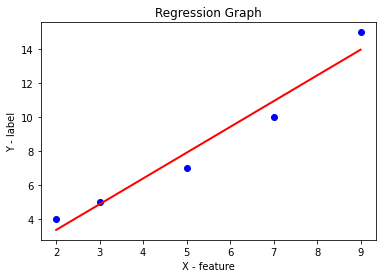

In [ ]:
# creating an instance of class
clf = lr()

# calling methods
# fit model
clf.fit(x_train, y_train)

print(clf.slope_)
print(clf.intercept_)

# predict using linear model
y_pred = clf.predict(x_train)

print('x_train \t predict', np.hstack((x_train.reshape(-1,1), y_pred.reshape(-1,1))), sep='\n')
clf.visual(x_train, y_train, y_pred)

## predict unknown data

In [ ]:
# create test data
x_test = np.array([1,6,8,8,9])

# predict using linear model
y_test_pred = clf.predict(x_test)

print('x_test \t\t predict', np.hstack((x_test.reshape(-1,1), y_test_pred.reshape(-1,1))), sep='\n')

x_test 		 predict
[[ 1.          1.82317073]
 [ 6.          9.41463415]
 [ 8.         12.45121951]
 [ 8.         12.45121951]
 [ 9.         13.9695122 ]]


# using linear regression package from Scikit-learn

In [ ]:
# import packages and classes
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
# provide data
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


In [ ]:
# create linear model and fit
clf = LinearRegression()
clf.fit(x, y)
#lr = LinearRegression().fit(x, y)

print('slope =', clf.coef_[0], 'intercept =', clf.intercept_)

slope = 0.54 intercept = 5.633333333333329


In [ ]:
# predict
y_pred = clf.predict(x)
print('predicted:', y_pred, sep='\n')

# equation : y = bx + a
y_pred = (clf.coef_*x)+clf.intercept_
print('predicted:', y_pred.T[0], sep='\n')

predicted:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]
predicted:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


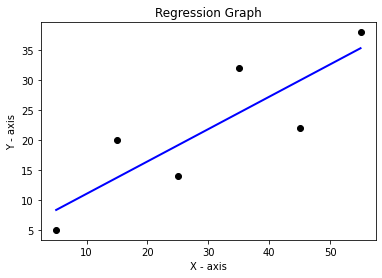

In [ ]:
# regression graph
import matplotlib.pyplot as plt
import math

plt.plot(x,y,'o',color='black')
plt.plot(x, y_pred, color='blue', linewidth=2)
plt.xlabel('X - feature')
plt.ylabel('Y - label')
plt.title('Regression Graph')
plt.show()

# using linear regression package from numpy

slope = 0.54 intercept = 5.633333333333347
predicted:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


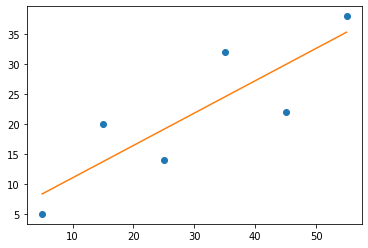

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

# b = slope, a = intercept
b, a = np.polyfit(x, y, 1)
print('slope =',b, 'intercept =',a)
y_pred = (b*x)+a
print('predicted:', y_pred, sep='\n')

# plot
plt.plot(x, y, 'o')
# add line of best fit
y_pred = (b*x)+a
plt.plot(x, y_pred)
#plt.plot(x, (b*x)+a)
plt.show()

In [ ]:
y_pred = (b*x)+a
print(y_pred)

[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


# R-squared error or coefficient of determination
![alt text](https://media.geeksforgeeks.org/wp-content/uploads/20190730201703/r_squared.png)

![alt text](https://miro.medium.com/max/1400/1*_HbrAW-tMRBli6ASD5Bttw.png)

In [ ]:
# r_sq should close to 1

sum_y_y_pred_2 = np.sum(np.power(y-y_pred, 2))
sum_y_y_bar_2 = np.sum(np.power(y-np.average(y), 2))

r_sq = 1 - (sum_y_y_pred_2 / sum_y_y_bar_2)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7158756137479542


In [ ]:
# get results - R_2 (R square) score
# r_sq should close to 1
r_sq = clf.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7158756137479542


![alt text](https://miro.medium.com/max/1400/1*A71zTD6_QqUzLhMKj1Rgiw.png)

# Mean Square Error (MSE)
![alt text](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-50d568506216f6ab6402504298c570e2_l3.svg)

In [ ]:
N = y.shape[0]
MSE = (1/N) * np.sum(np.power((y-y_pred),2))
print(MSE)

33.755555555555546


In [ ]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y, y_pred))

33.75555555555555


In [ ]:
# MSE using Numpy module

import numpy as np

MSE = np.square(np.subtract(y, y_pred)).mean()
print(MSE)

33.75555555555555


# Boston housing prices prediction using linear regression

In [ ]:
from sklearn import datasets ## imports datasets from scikit-learn

data = datasets.load_boston() ## loads Boston dataset from datasets library

In [ ]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
print(data.data.shape)
data.data

(506, 13)


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
import pandas as pd

boston = pd.DataFrame(data.data, columns = data.feature_names)
print(boston.shape)
boston.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
print(data.target.shape)
data.target

(506,)


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
boston['PRICE'] = data.target

boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# data preprocessing

## checking missing values in the data

In [ ]:
boston.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Exploratory data analysis
* visualizations data to understand the relationship of the target variable with other features.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


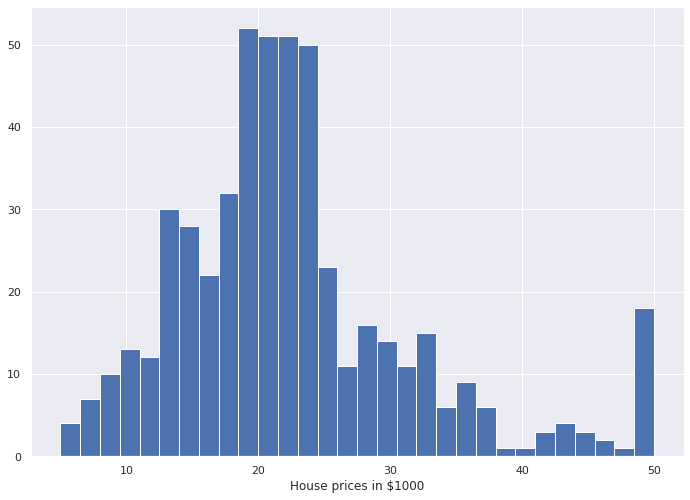

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(boston['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

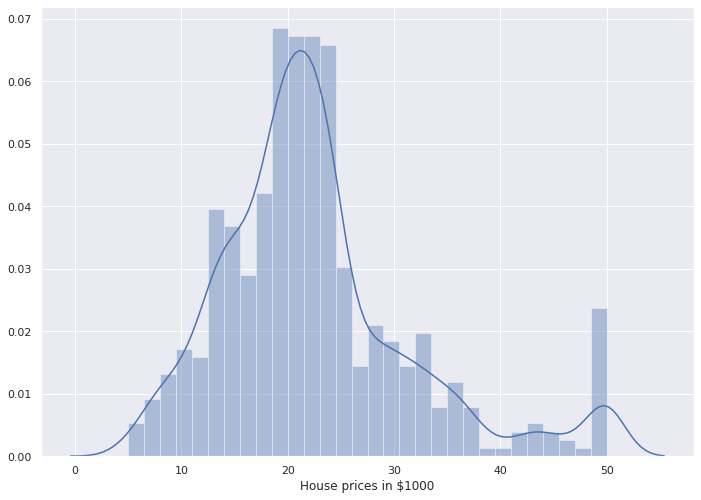

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

## Create a correlation matrix that measures the linear relationships between the variables.
* The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

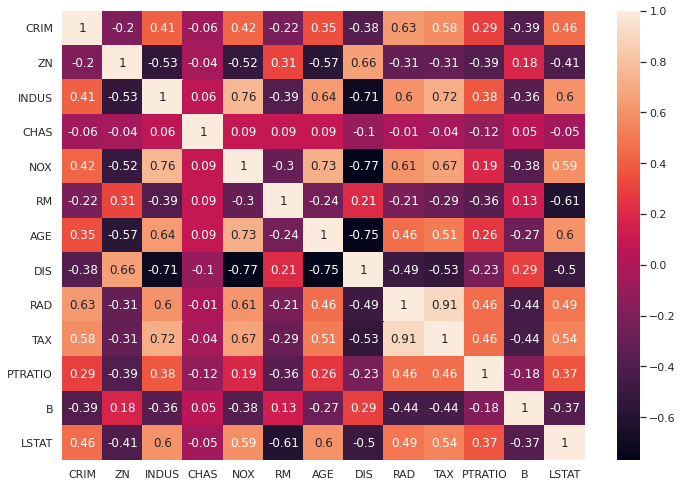

In [ ]:
bos = pd.DataFrame(data.data, columns = data.feature_names)
correlation_matrix = bos.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Notice
*     By looking at the correlation matrix we can see that RM has a strong positive correlation with PRICE (0.7) where as LSTAT has a high negative correlation with PRICE (-0.74).
*    An important point in selecting features for a linear regression model is to check for multicolinearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. This can affect the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

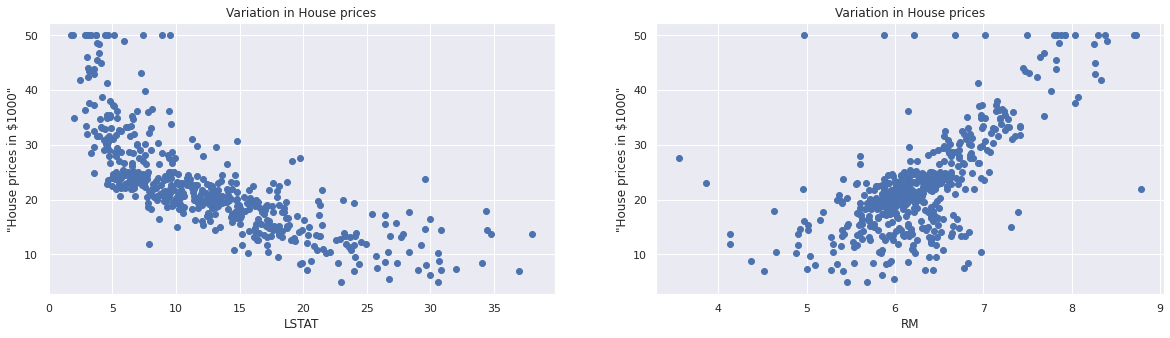

In [ ]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

Since you saw that ‘RM’ shows positive correlation with the House Prices we will use this variable.

In [ ]:
X_rooms = boston.RM
y_price = boston.PRICE

X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


## splitting the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

# model evaluation for training set
y_train_pred = lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_pred)))
r2 = round(lr.score(X_train, Y_train),2)

print("The model performance for test set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for test set
--------------------------------------
Root Mean Squared Error: 6.972277149440585
R^2: 0.43




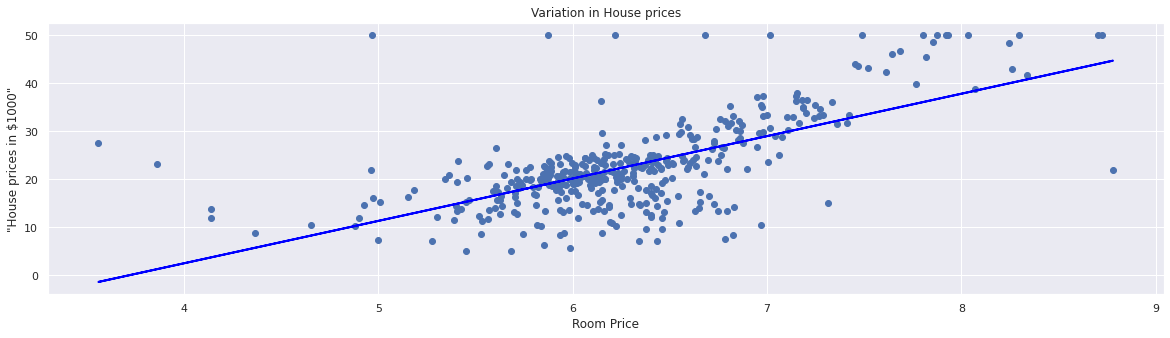

In [ ]:
# evaluate on test set
plt.figure(figsize=(20, 5))
plt.scatter(X_train, Y_train, marker='o')
plt.plot(X_train, y_train_pred, color='blue', linewidth=2)
plt.title("Variation in House prices")
plt.xlabel('Room Price')
plt.ylabel('"House prices in $1000"')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

# model evaluation for test set
y_pred = lr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_pred)))
r2 = round(lr.score(X_test, Y_test),2)

print("The model performance for test set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for test set
--------------------------------------
Root Mean Squared Error: 4.895963186952216
R^2: 0.69




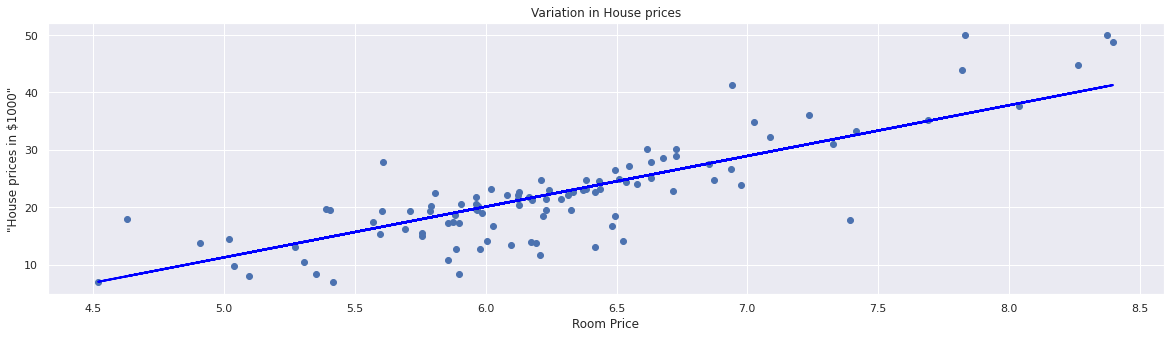

In [ ]:
# evaluate on test set
plt.figure(figsize=(20, 5))
plt.scatter(X_test, Y_test, marker='o')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.title("Variation in House prices")
plt.xlabel('Room Price')
plt.ylabel('"House prices in $1000"')
plt.show()

# linear regression for all boston data

In [ ]:
X = boston.drop('PRICE', axis = 1)
y = boston['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

lr_all = LinearRegression()
lr_all.fit(X_train, y_train)

# model evaluation for training set

y_train_predict = lr_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(lr_all.score(X_train, y_train),2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.6520331848801675
R2 score is 0.75




![alt text](https://miro.medium.com/max/1276/1*-DWX3ZJaj0bvM1aPxcrtyA.jpeg)

Read
* https://medium.com/@subarna.lamsal1/multiple-linear-regression-sklearn-and-statsmodels-798750747755

### Read me

* Step-by-step - https://www.statisticshowto.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/
* https://data36.com/linear-regression-in-python-numpy-polyfit/
* https://medium.com/analytics-vidhya/simple-linear-regression-with-example-using-numpy-e7b984f0d15e
* https://medium.com/@amitg0161/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a

Dataset
* https://www.kaggle.com/marcospessotto/happiness-and-alcohol-consumption/data